# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.

In [13]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [14]:
# Bank of America
BAC = yf.download("BAC", start, end)

# CitiGroup
C = yf.download("C", start, end)

# Goldman Sachs
GS = yf.download("GS", start, end)

# JPMorgan Chase
JPM = yf.download("JPM", start, end)

# Morgan Stanley
MS = yf.download("MS", start, end)

# Wells Fargo
WFC = yf.download("WFC", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
# Could also do this for a Panel Object
# df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [17]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [18]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [19]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [20]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.750570  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.413363  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.453835  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.406618  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.426855  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  32.661308  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  32.683712  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  32.773331  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  32.806946  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.154217  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.124546  11016400  
2006-01-04   31.530001  18.902719  10870000  
2006-01-05   31.495001  18.881750  10158000  
2006-01-06   31.680000  18.992651   8403800  
2006-01-09   31.674999  18.989655   5619600  

[5 rows x 36 columns]

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [22]:
returns = pd.DataFrame()

In [23]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

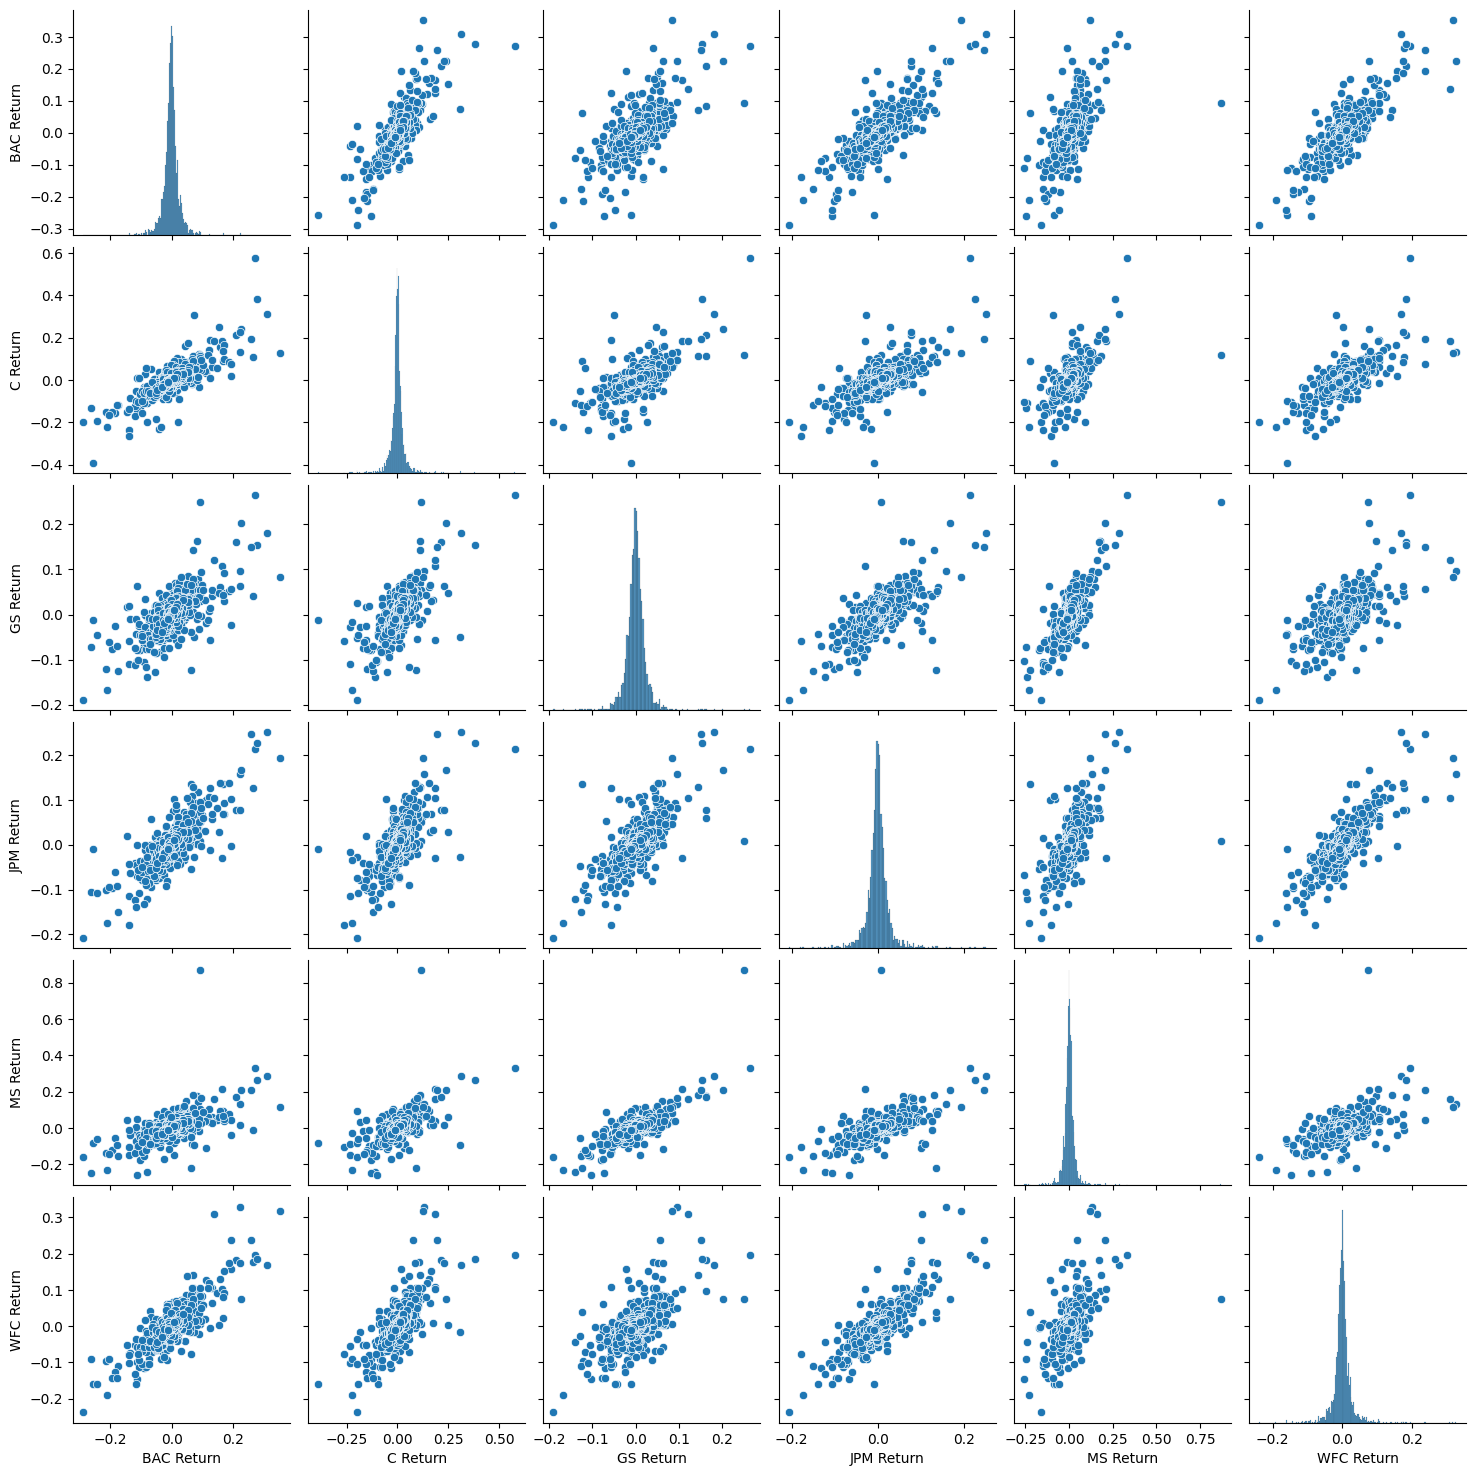

In [24]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [25]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [26]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [27]:
returns.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [33]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

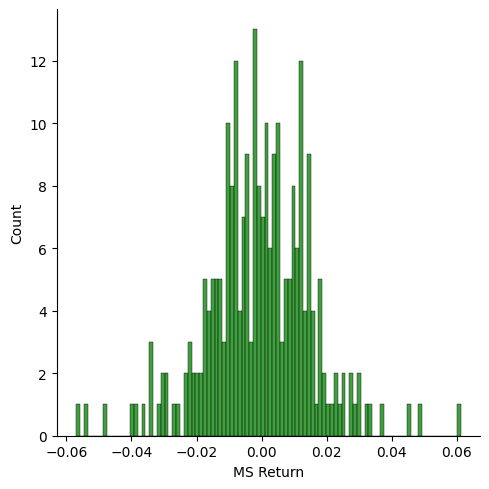

In [35]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

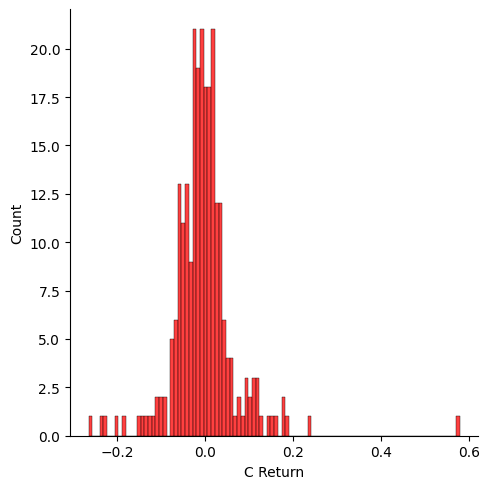

In [36]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly.offline as pl
import plotly.graph_objs as go

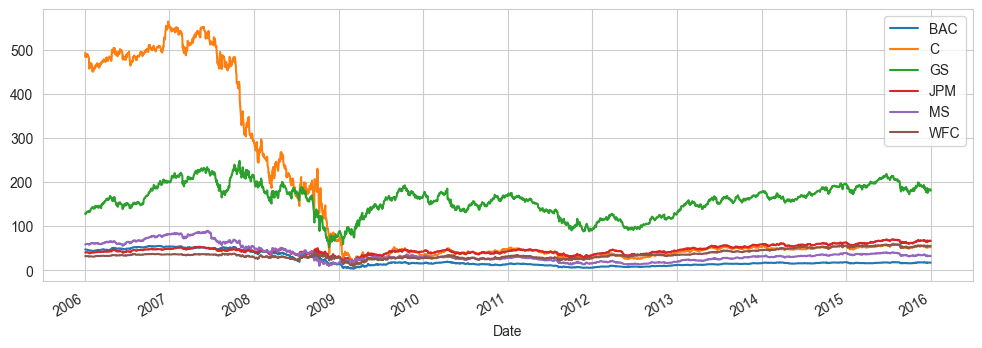

In [38]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

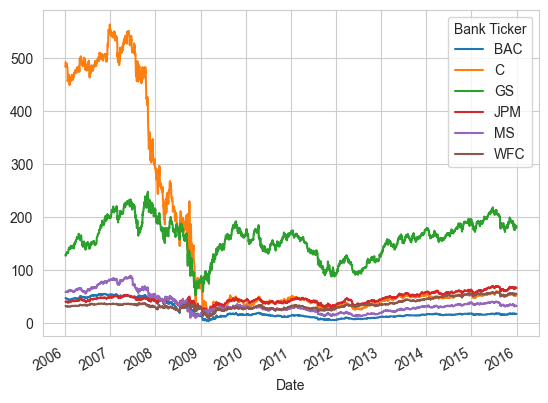

In [39]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

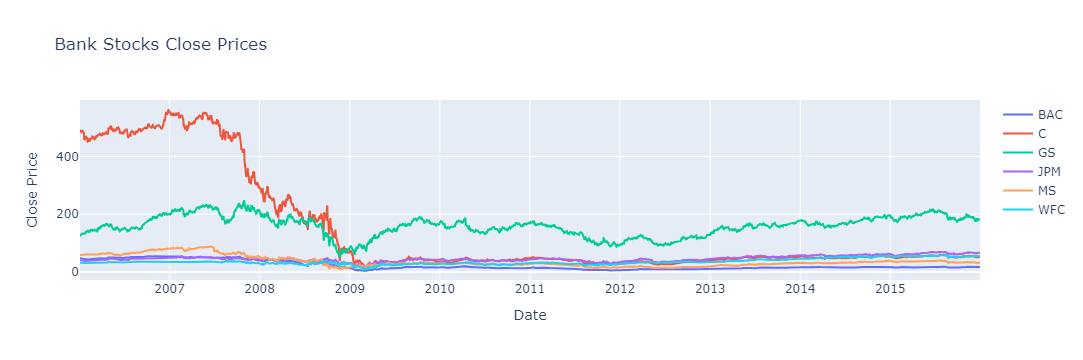

In [42]:
# plotly
close_prices = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
traces = []
for col in close_prices.columns:
    trace = go.Scatter(
        x=close_prices.index,
        y=close_prices[col],
        mode='lines',
        name=col
    )
    traces.append(trace)

# Create the figure
layout = go.Layout(
    title='Bank Stocks Close Prices',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Close Price'),
)
fig = go.Figure(data=traces, layout=layout)

# Plot using iplot
pl.iplot(fig)


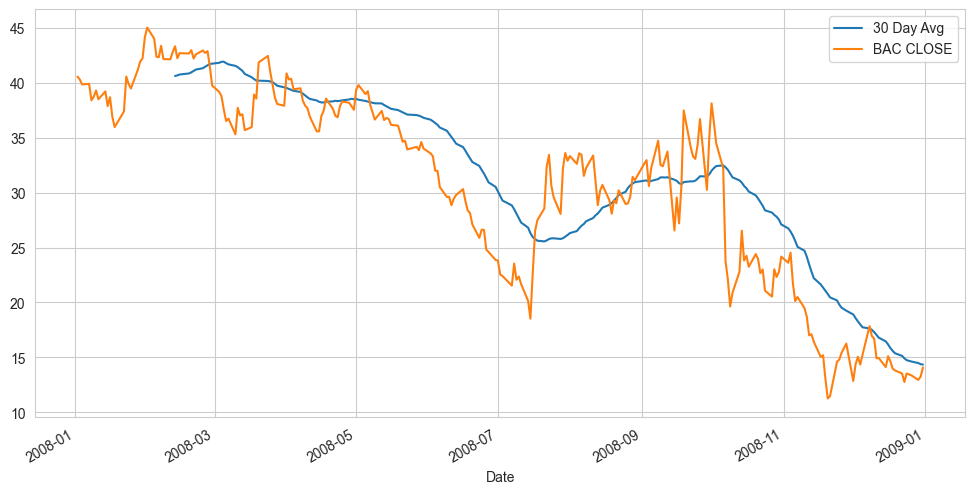

In [43]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

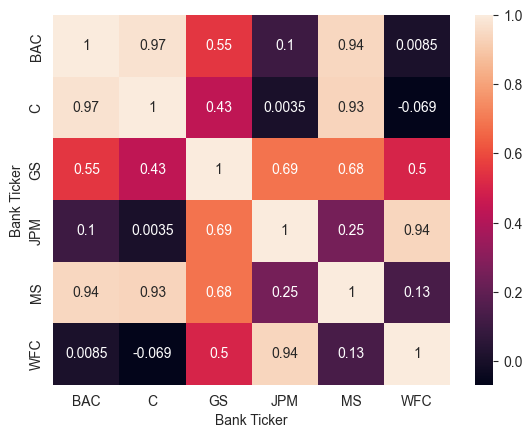

In [44]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

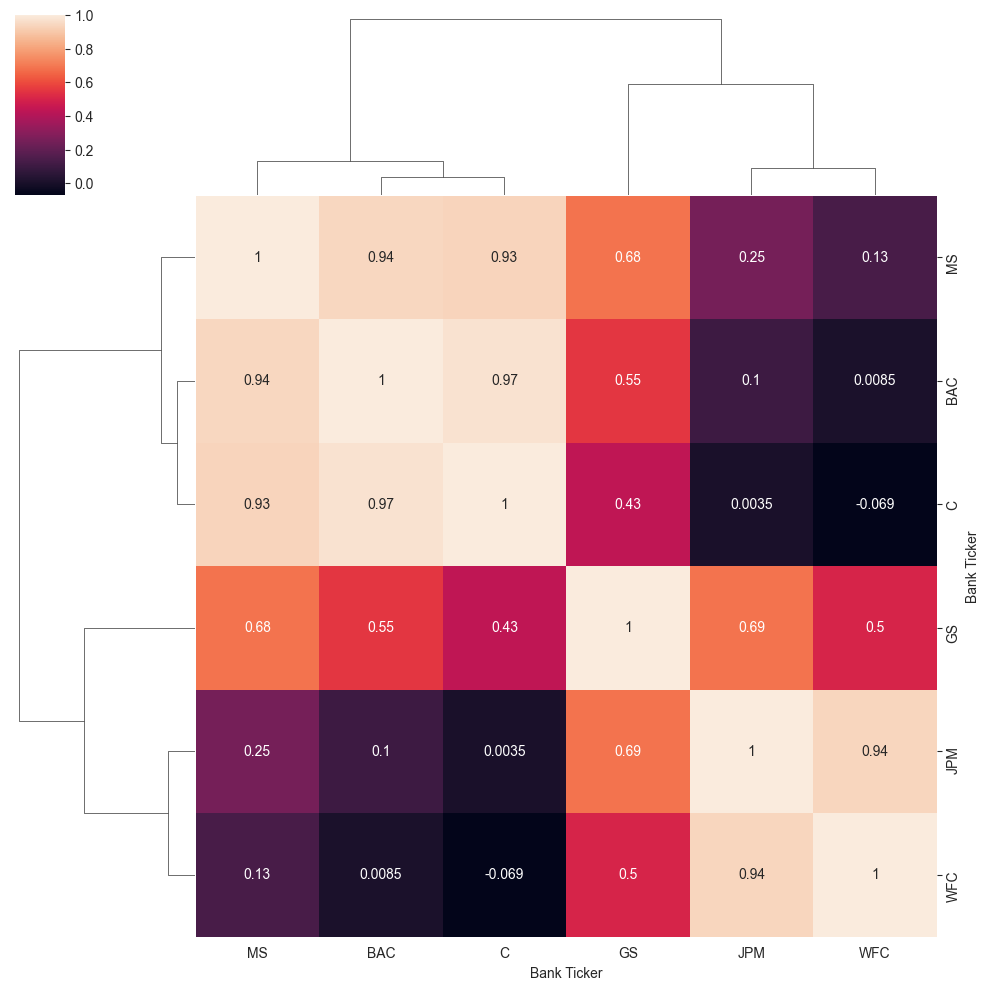

In [45]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

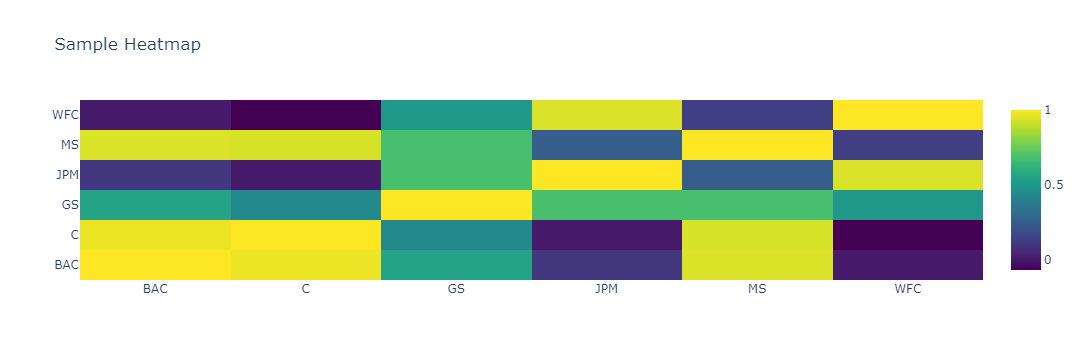

In [49]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr
# close_corr.iplot(kind='heatmap',colorscale='rdylbu')



heatmap = go.Heatmap(
    z=close_corr,
    x=close_corr.index,  # X-axis labels
    y=close_corr.index,  # Y-axis labels
    colorscale='Viridis'  # Colormap
)

layout = go.Layout(title='Sample Heatmap')

# Create the figure
fig = go.Figure(data=[heatmap], layout=layout)

# Plot the heatmap using iplot
pl.iplot(fig)


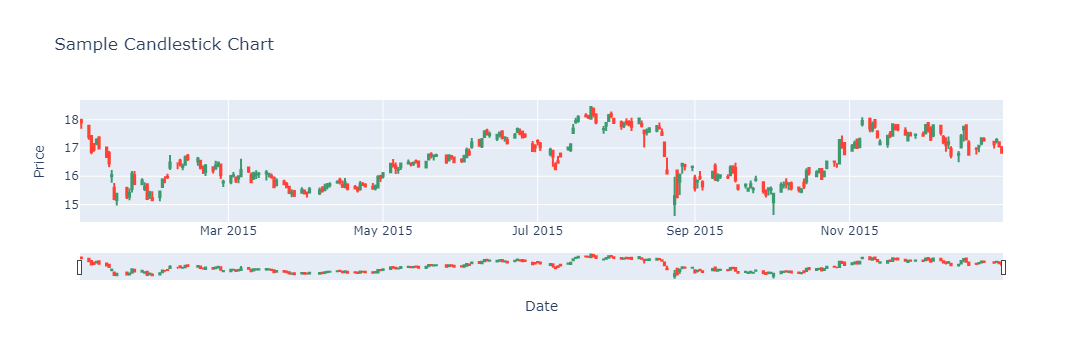

In [60]:
# BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')
temp_df=BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
temp_df.reset_index(inplace=True)

candlestick = go.Candlestick(
    x=temp_df['Date'],
    open=temp_df['Open'],
    high=temp_df['High'],
    low=temp_df['Low'],
    close=temp_df['Close'],
    name='Candlestick'
)
layout = go.Layout(
    title='Sample Candlestick Chart',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)
fig = go.Figure(data=[candlestick], layout=layout)

# Plot the candlestick chart using iplot
pl.iplot(fig)

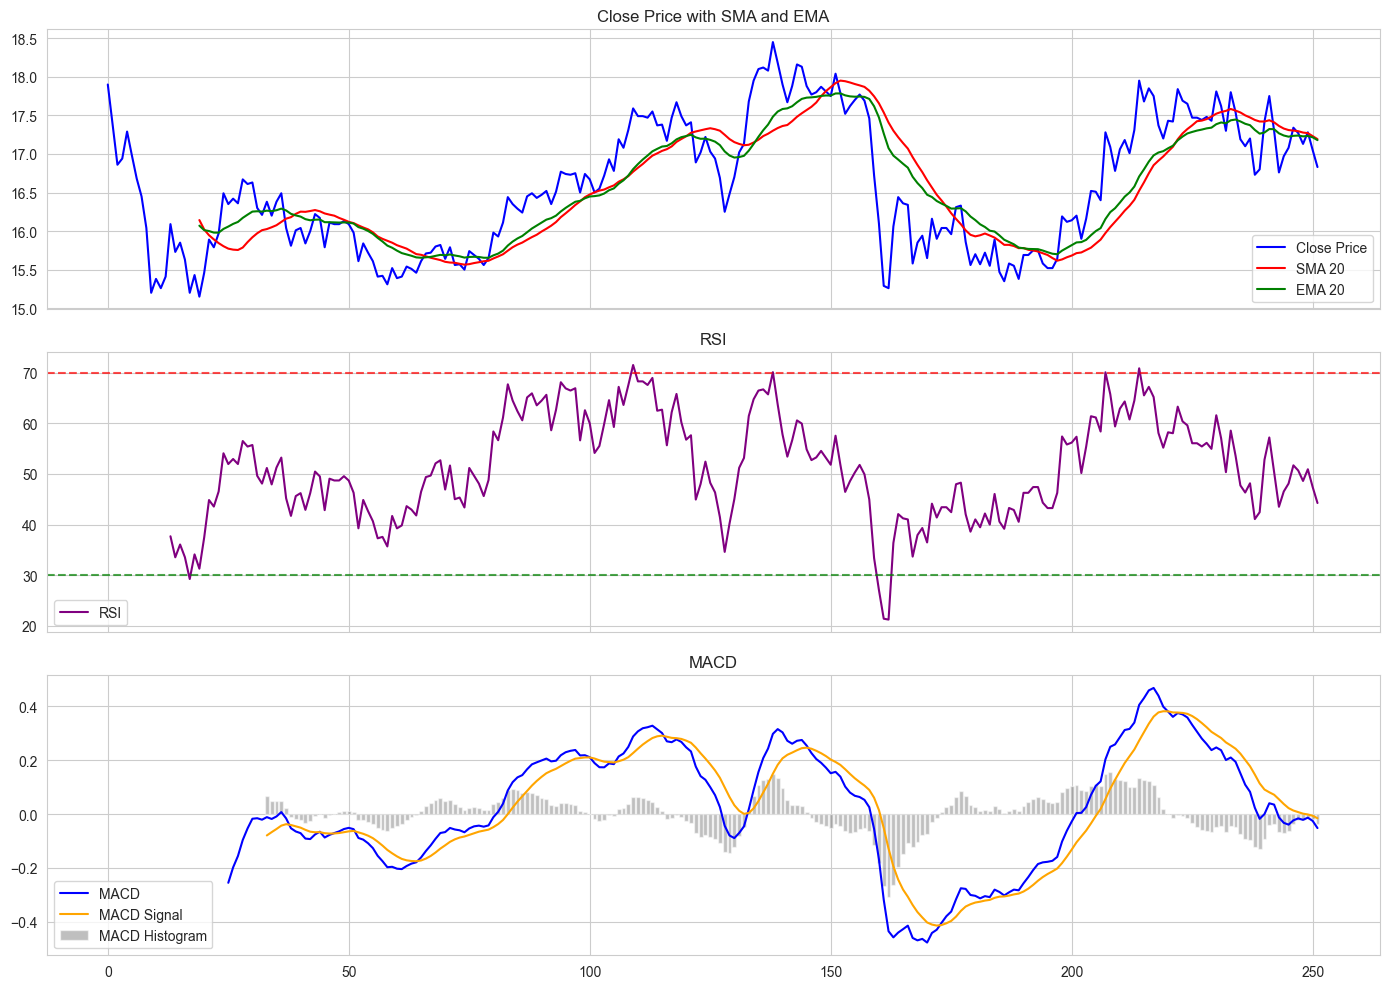

In [64]:
import ta
temp_df['SMA'] = ta.trend.sma_indicator(temp_df['Close'], window=20)
temp_df['EMA'] = ta.trend.ema_indicator(temp_df['Close'], window=20)
temp_df['RSI'] = ta.momentum.RSIIndicator(temp_df['Close']).rsi()
temp_df['MACD'] = ta.trend.macd(temp_df['Close'])
temp_df['MACD_signal'] = ta.trend.macd_signal(temp_df['Close'])
temp_df['MACD_diff'] = ta.trend.macd_diff(temp_df['Close'])

# Plotting the indicators
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Plot Close price with SMA and EMA
axs[0].plot(temp_df.index, temp_df['Close'], label='Close Price', color='blue')
axs[0].plot(temp_df.index, temp_df['SMA'], label='SMA 20', color='red')
axs[0].plot(temp_df.index, temp_df['EMA'], label='EMA 20', color='green')
axs[0].set_title('Close Price with SMA and EMA')
axs[0].legend()

# Plot RSI
axs[1].plot(temp_df.index, temp_df['RSI'], label='RSI', color='purple')
axs[1].axhline(70, linestyle='--', color='red', alpha=0.7)
axs[1].axhline(30, linestyle='--', color='green', alpha=0.7)
axs[1].set_title('RSI')
axs[1].legend()

# Plot MACD
axs[2].plot(temp_df.index, temp_df['MACD'], label='MACD', color='blue')
axs[2].plot(temp_df.index, temp_df['MACD_signal'], label='MACD Signal', color='orange')
axs[2].bar(temp_df.index, temp_df['MACD_diff'], label='MACD Histogram', color='grey', alpha=0.5)
axs[2].set_title('MACD')
axs[2].legend()

plt.tight_layout()
plt.show()

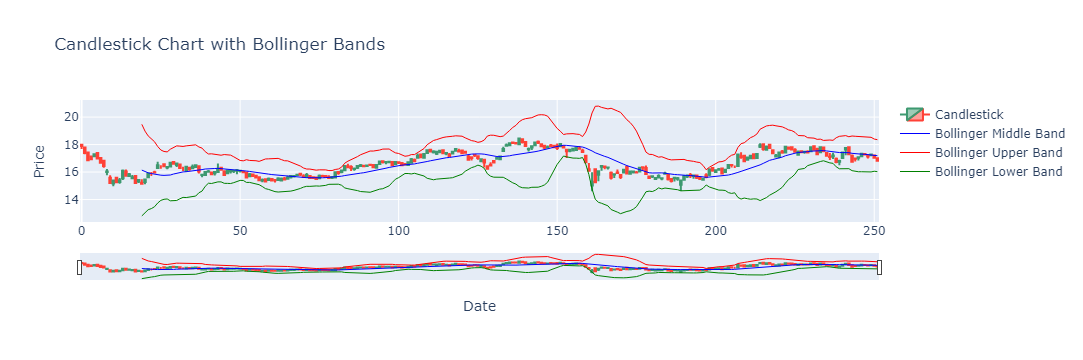

In [66]:
# Calculate Bollinger Bands
bollinger = ta.volatility.BollingerBands(close=temp_df['Close'], window=20, window_dev=4)

temp_df['Bollinger_Middle'] = bollinger.bollinger_mavg()
temp_df['Bollinger_Upper'] = bollinger.bollinger_hband()
temp_df['Bollinger_Lower'] = bollinger.bollinger_lband()
# Plotting the Bollinger Bands
candlestick = go.Candlestick(
    x=temp_df.index,
    open=temp_df['Open'],
    high=temp_df['High'],
    low=temp_df['Low'],
    close=temp_df['Close'],
    name='Candlestick'
)

middle_band = go.Scatter(
    x=temp_df.index,
    y=temp_df['Bollinger_Middle'],
    line=dict(color='blue', width=1),
    name='Bollinger Middle Band'
)

upper_band = go.Scatter(
    x=temp_df.index,
    y=temp_df['Bollinger_Upper'],
    line=dict(color='red', width=1),
    name='Bollinger Upper Band'
)

lower_band = go.Scatter(
    x=temp_df.index,
    y=temp_df['Bollinger_Lower'],
    line=dict(color='green', width=1),
    name='Bollinger Lower Band'
)

data = [candlestick, middle_band, upper_band, lower_band]

layout = go.Layout(
    title='Candlestick Chart with Bollinger Bands',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

fig = go.Figure(data=data, layout=layout)

pl.iplot(fig)